In [1]:
# Overview of the Project
## Import and Inspect CSV Files
## Merge your DataFrames
## Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the 
## total number of drivers for each city type, including urban, suburban, and rural
## Determine the mean, median, and mode for the following:
 # The total number of rides for each city type
 # The average fares for each city type
 # The total number of drivers for each city type
## Create box-and-whisker plots that visualize each of the following to determine if there are any outliers
 # The number of rides for each city type
 # The fares for each city type
 # The number of drivers for each city type
## Create a pie chart that visualizes each of the following data for each city type
 # The percent of total fares
 # The percent of total rides
 # The percent of total drivers

In [2]:
# Load the CSV files

# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# declare variables that connect to the CSV files in the Resources folder

# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# read a CSV file into Pandas, we use 
## pd.read_csv

# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the Ride Data File

# load the ride_data.csv file into a Pandas DataFrame

# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Explore the Data in Pandas

# Inspect the City Data DataFrame
 #1. Get all the rows that contain null values.
    ## df.count()
    # or
    ## df.isnull().sum()
 #2. Make sure the driver_count column has an integer data type.
 #3. Find out how many data points there are for each type of city.

In [7]:
 #1. Get all the rows that contain null values.
    ## df.count()
    # or
    ## df.isnull().sum()

# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
# make sure there are no null values

# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
 #2. Make sure the driver_count column has an integer data type.
    
# see if the driver_count column has a numerical data type because we plan to perform mathematical calculations on that column

# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
 #3. Find out how many data points there are for each type of city.
    
# check to see how many data points there are for each type of city
# use the 
    ## sum() 
# method on the city_data_df for the type column where the condition equals each city in the DataFrame

# Get the unique values of the type of city.
# you'll see that the output will be an array of different types of cities
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
# Now we can use the sum() method on the city_data_df for the type column where the condition equals either 
# Urban, Suburban, or Rural
# To get the number of data points for the Urban cities, add the following code to a new cell:

# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [12]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

In [13]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [14]:
# Inspect Ride Data DataFrame

# For the ride_data_df DataFrame, we need to:
 #1. Get all the rows that contain null values.
 #2. Make sure the fare and ride_id columns are numerical data types.

In [15]:
 #1. Get all the rows that contain null values.

# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [16]:
# make sure there are no null values

# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [17]:
 #2. Make sure the fare and ride_id columns are numerical data types.

# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [18]:
# Merge DataFrames
# when we merge two DataFrames, we merge on a column with the same data, and the same column name, in both DataFrames. 
# We use the following syntax to do that:
## new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])

In [19]:
# Looking at the columns in the two DataFrames, we can see that the column the DataFrames have in common is city. 
# Therefore, we will merge the two DataFrames on the city column, and then add the city_data_df to the end of the 
# ride_data_df DataFrame with the constraint how="left"

# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [21]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [22]:
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [23]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [24]:
# 5.3.2 Get the Number of Rides for Each City Type

In [25]:
# To get the number of rides for each city by each type of city, we have to create a Series where the index is the name of 
# the city and the column is the number of rides for that city

# We'll use the groupby() function to create a Series of data that has the name of the city as the index, 
# apply the count() method to the Series for each city, and select the ride_id column

In [26]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [27]:
# Using the same approach, we can create the suburban_ride_count and the rural_ride_count Series. 
# To do so, add the following code to a new cell and run the cell

In [28]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [29]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [30]:
# Next, we'll use the groupby() function on the city type DataFrames to get the average fare for each city type. 
# This will be our second dataset

In [31]:
# 5.3.3 Get the Average Fare for Each City Type

In [32]:
# Using the groupby() function, we can chain the mean() method to get the averages of the fare column

In [33]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [34]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [35]:
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [36]:
# 5.3.4 Get the Average Number of Drivers for Each City Type

In [37]:
# To get the average number of drivers for each city in the urban, suburban, and rural cities, we can use the groupby() 
# function and get the mean() of the driver_count column

In [38]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [39]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [40]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [41]:
# 5.3.5 Create Bubble Charts

# Our first task will be to create a scatter plot for each type of city where the following conditions are met
## The x-axis is the number of rides for each city
## The y-axis is the average fare for each city
## The size of each marker is the average number of drivers in each city

In [42]:
# Let's create each scatter plot individually and add them all to one chart
# The first scatter plot we'll make is for urban cities. We'll create our plots using the MATLAB method

In [43]:
# Create the Urban Cities Bubble Chart
# To the plt.scatter() function, let's add the x- and y-axis data, where the x-axis is the urban_ride_count and the 
# y-axis is the urban_avg_fare

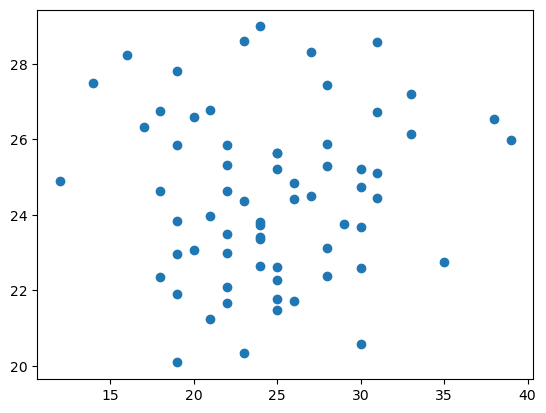

In [44]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare)

In [45]:
# editing the plt.scatter(urban_ride_count, urban_avg_fare) code to increase the size of the markers and add a label for 
# the legend
# To change the size of the markers, add the s= parameter to the scatter() function.

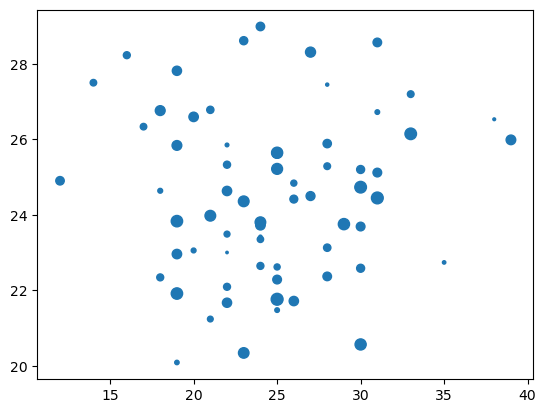

In [46]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=urban_driver_count)

In [47]:
# Some of the bubbles are still too small, so let's increase the size by a factor of 10 and add a black edge color to the 
# circles that have a line width of 1. While we're changing these features, let's pay homage to the company's color scheme and 
# make the urban markers coral and 20% transparent. We can also add a title, labels for the axes, a legend, and a grid

# To change the marker color, we add the 
## color= 
# parameter to the 
## scatter() 
# function.

# To add a title, x-axis and y-axis labels, and a legend, we use the 
## plt.title()
## plt.ylabel()
## plt.xlabel()
# and 
## plt.legend() 
# functions, respectively

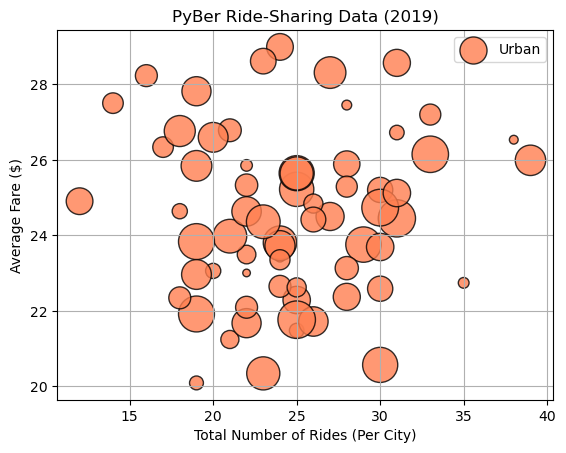

In [48]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

In [49]:
# Create the Suburban Cities Bubble Chart

In [50]:
# Now that we know what the final individual bubble chart should look like, we can repurpose the code and change some variables 
# to create the suburban cities bubble chart.

# Let's create the same bubble chart as we did for the urban cities chart but change the color to sky blue

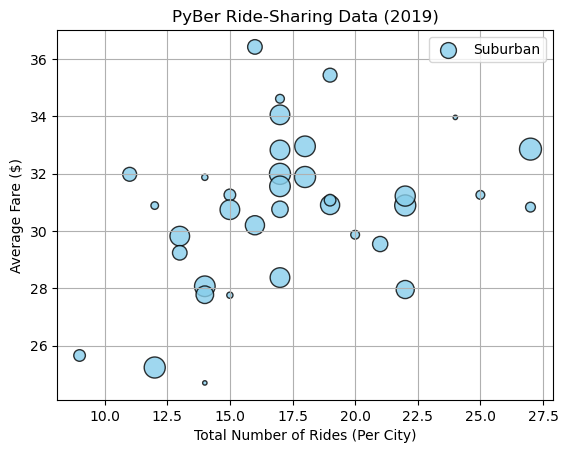

In [51]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

In [52]:
# Create the Rural Cities Bubble Chart

In [53]:
# We have two of the three bubble charts. Let's create the final bubble chart: the rural cities bubble chart. 
# Repurposing the code from the suburban cities bubble chart, we'll change the x- and y-axes variables and the size 
# parameter to the rural city data, and we will change the color of the circle to gold

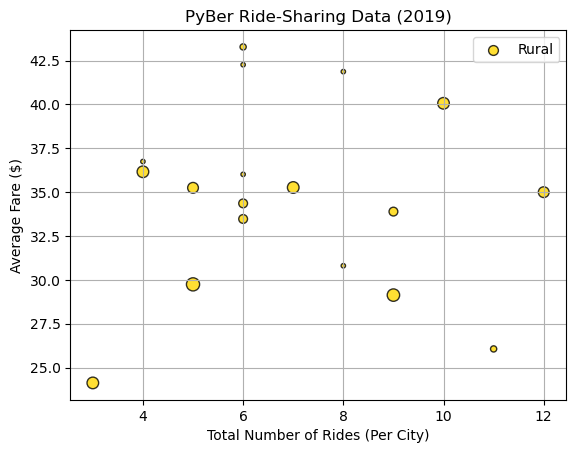

In [54]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

In [55]:
# 5.3.6 Create a Bubble Chart for All Cities

In [56]:
# To create a bubble chart that showcases all the different city types in one chart, we'll combine our three scatter 
# plot code blocks in one Jupyter Notebook cell

# Add the three 
## plt.scatter() 
# functions for each chart to one cell and run the cell

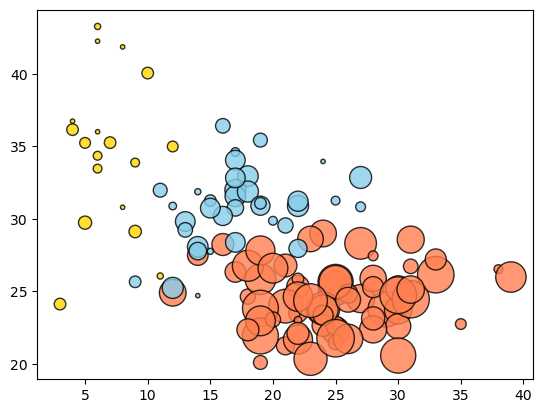

In [57]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Show the plot
plt.show()

In [58]:
# Did you notice that we did not have to change the x-limit? That's because plotting all the data on one chart formats 
# the x-axis automatically. We could change the y-limit from 0 to 40, but that might crowd the bubbles in the middle of the 
# chart, making it harder to see any differences in the data

# add a title, labels for the axes, a legend, and a grid for all three charts and increase the font size of the axes labels 
# to 12 and the title to 20. We'll also enlarge the figure so the markers are more spread out

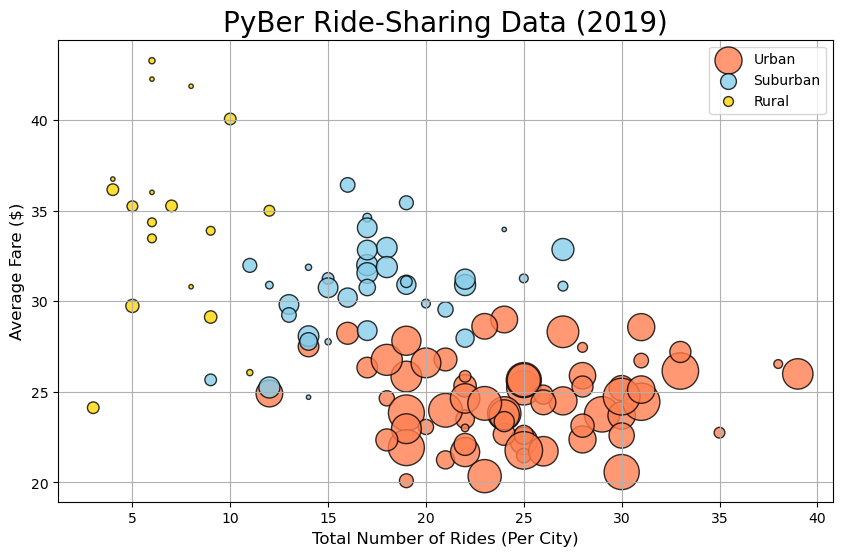

In [59]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Show the plot
plt.show()

In [60]:
# The markers in the legend have different sizes, which are automatically determined based on the average size of the marker. 
# Therefore, we'll need to customize the legend to scale them to the same size

# We can declare a variable for the legend function, 
## lgnd = plt.legend()
# and add parameters for font size, legend location, and legend title, along with some other features

# After we declare the variable for the legend, we can use 
## legendHandles[]._sizes 
# to set the font size of the marker in the legend to a fixed size. Inside the brackets, we can add the list element for the 
# number of markers in the legend

# Add the following code to your scatter plot code in place of 
## plt.legend()

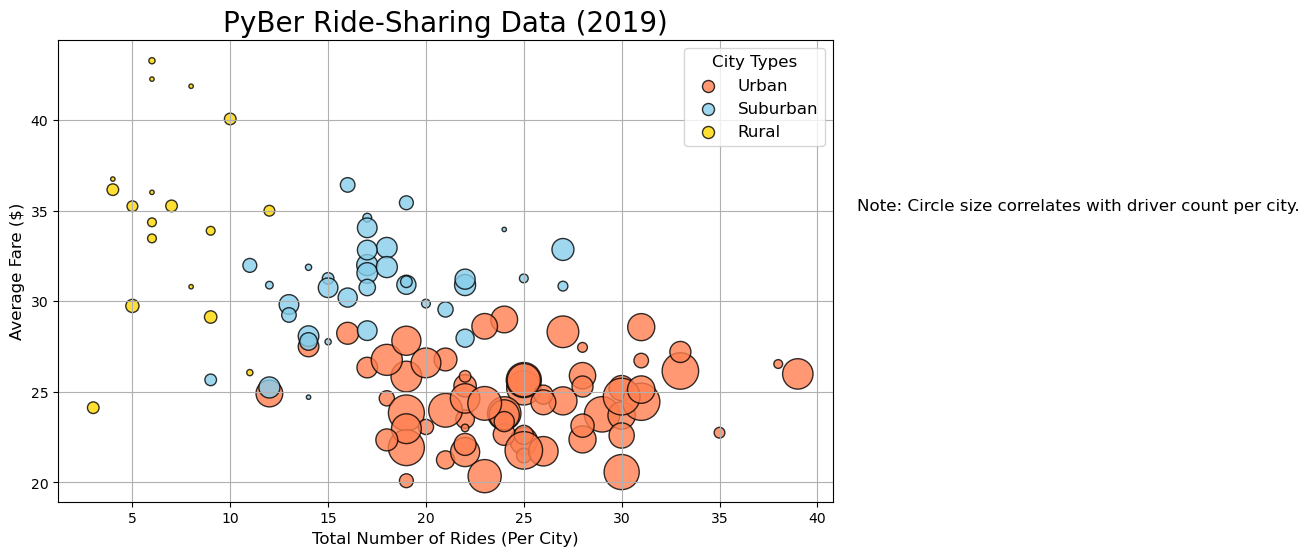

In [61]:
# Create a legend
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()

In [62]:
# Let's break down what this code is doing for the legend:
 #1. We made the font size for the text "small" with fontsize=
 #2. Then we expanded the legend horizontally using mode= to fit the area. Because the font size is small, this is optional
 #3. We added the number of scatter points in the legend for each marker to be 1. We can add multiple marker points by 
     # increasing the number.
 #4. The location setting, loc=, for the legend is where it will fit the "best" based on the plotting of the data points
 #5. We added a legend title
 #6. We set each marker in the legend equal to 75-point font by using the legendHandles[]._sizes attribute and list 
     # indexing in the brackets to reference one of the three scatter plots. 
 #7. Finally, we increased the font size of the legend title to 12

In [63]:
# add a note to the right of the chart to let the viewer know that the circle size correlates with the driver count for 
# each city
## plt.text()
# The x and y coordinates are based on the chart coordinates. We can see that our chart has a width 
# (i.e., x, between 0 and 42; and y, between 18 and 50). Our x position can be 42, and the y position can be in the middle, 
# 32–35

# Add the following code after the code that creates the legend
## plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

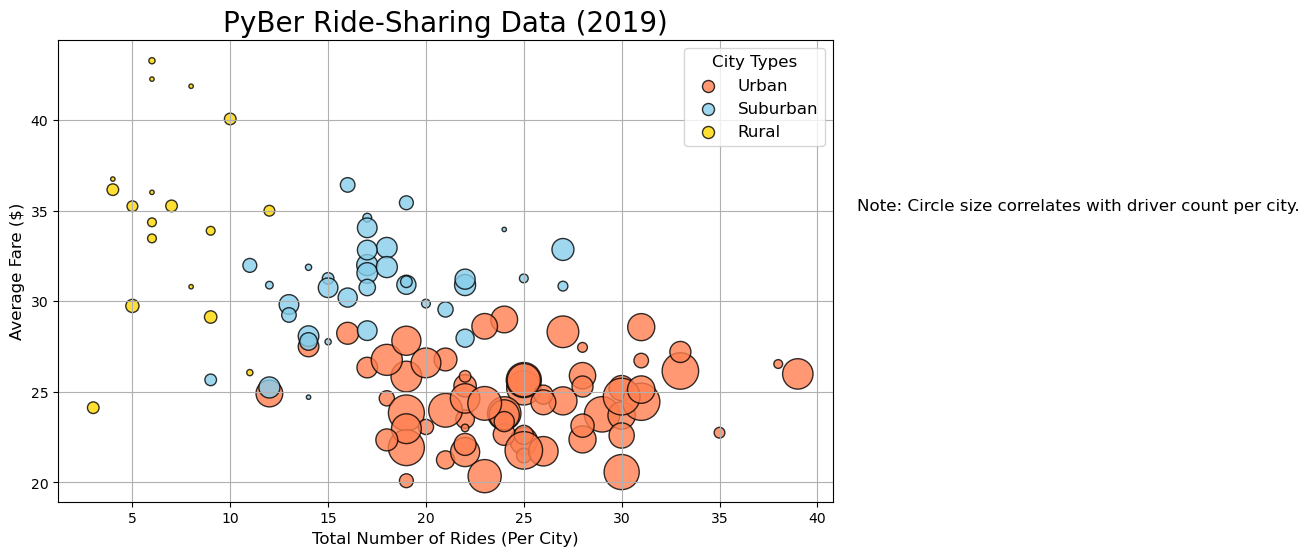

In [64]:
# Create a legend
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()

In [65]:
# save the chart in a folder using the 
## plt.savefig() 
# function, and provide a direct path to the folder and filename of the saved image
# Add the following code after the code that added the text
## plt.savefig("analysis/Fig1.png")

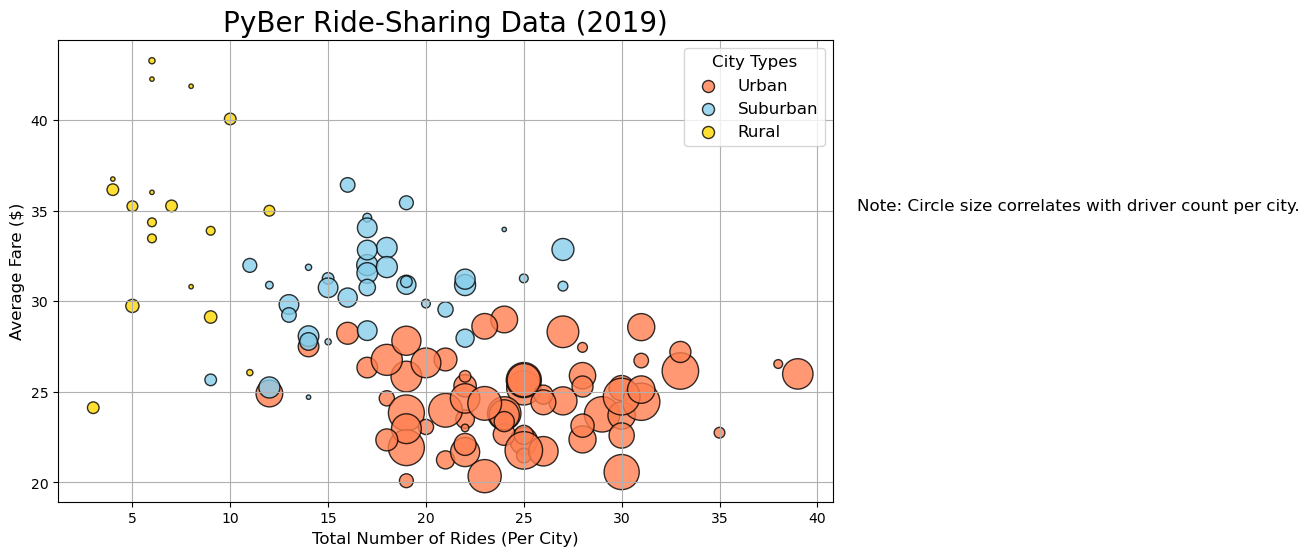

In [67]:
# Create a legend
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Analysis/Fig1.png")

# Show the plot
plt.show()

In [68]:
# 5.4.1 Summary Statistics for Number of Rides by City Type

In [69]:
# The measures of central tendency refer to the tendency of data to be toward the middle of the dataset. 
# The three key measures of central tendency are the mean, median, and mode

# Pandas describe() Function
# The describe() function is a convenient tool to get a high-level summary statistics on a DataFrame or Series. 
# After running the function, the output will show the count, mean, standard deviation, minimum value, 25%, 50%, and 
# 75% percentiles, and maximum value from a DataFrame column that has numeric values
# Remember—quartiles are percentiles. The lower quartile is the 25th percentile. The upper quartile is the 75th percentile

In [81]:
# Get summary statistics for urban cities.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [82]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [83]:
# Get summary statistics for rural cities.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [ ]:
# Pandas mean(), median(), and mode() Methods

# If we want to get only the mean without getting the complete summary statistics, we can use the mean() method

In [84]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [ ]:
# To get the median of DataFrame or Series, we can also use the Pandas median() method in the same way as we used the 
# mean() method

In [85]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [ ]:
# Similarly, we can use the mode() method to get the mode of the ride counts for each city.

In [86]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [87]:
# Calculate the mode of the ride count for the suburban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [88]:
# Calculate the mode of the ride count for the rural cities.
rural_ride_count.mode()

0    6
dtype: int64

In [ ]:
# NumPy mean() and median() Functions and SciPy mode() Function

# An optional approach to calculating the mean, median, and mode of a DataFrame or Series is to use the NumPy and SciPy 
# statistics modules. We introduce these methods because there might come a time when you're working in the Python interpreter 
# or VS Code environment instead of the Jupyter Notebook environment.

# Whether you are using the use the Python interpreter, VS Code, or Jupyter Notebook environment, we will need to import the 
# NumPy and SciPy statistics modules. Add the following import statements to a new cell in your PyBer.ipynb file and run the 
# cell.

In [89]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [90]:
# Let's calculate the mean, median, and mode—otherwise known as the measures of central tendency for the ride counts—and print 
# out those measures.

# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [ ]:
# Let's go over what the output gives us:
 #1. The mean and median values that were returned are the same values that were returned using the ##describe() function and 
     # the ##mean() and ##median() methods, respectively.
 #2. With SciPy statistics, the mode result that's returned is the mode that appears the most frequently.
 #3. ##ModeResult returned two attributes:
    # The first attribute, mode, is 22.
    # The second attribute, count, is the number of times it occurs in the dataset, in this case, 7.
    
# Unlike the Pandas ##mode() method, the ##sts.mode() method will return the number of times the mode appears in the dataset.

In [91]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the suburban counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the suburban counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [92]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the rural counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the rural counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [ ]:
# 5.4.2 Summary Statistics for the Fare by City Type

# In order to get the summary statistics for the average fare for each city type, we'll need to get the data from the "fare" 
# column in each city type DataFrame

In [93]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [ ]:
# Now we can calculate the mean, median, and mode for the urban_fares Series. To get the mean and median, we'll use the NumPy 
# mean and median functions; to get the mode, we'll use the SciPy statistics mode function, sts.mode(). Using this mode function
# returns how many times the mode appears in the dataset.

In [94]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [96]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [97]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [98]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [99]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [ ]:
# 5.4.3 Summary Statistics for the Number of Drivers by City Type

In [ ]:
# In order to perform summary statistics for the number of drivers by city type, we need to create a Series for each city type 
# based on the driver_count column in each city type DataFrame.

In [100]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [101]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [102]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [ ]:
# skill drill

# Calculate the mean, median, and mode for the urban, suburban, and rural driver count Series using NumPy and 
# SciPy statistics module.

In [106]:
# Calculate the mean, median, and mode for the urban driver count
mean_urban_driver_count = np.mean(urban_driver_count)
print(f"The mean for the driver counts for urban trips is {mean_urban_driver_count:.2f}.")

median_urban_driver_count = np.median(urban_driver_count)
print(f"The median for the driver counts for urban driver is {median_urban_driver_count}.")

mode_urban_driver_count = sts.mode(urban_driver_count)
print(f"The mode for the driver counts for urban driver is {mode_urban_driver_count}.")

The mean for the driver counts for urban trips is 36.44.
The median for the driver counts for urban driver is 37.0.
The mode for the driver counts for urban driver is ModeResult(mode=array([25.]), count=array([4])).


In [107]:
# Calculate the mean, median, and mode for the suburban driver count
mean_suburban_driver_count = np.mean(suburban_driver_count)
print(f"The mean for the driver counts for suburban driver is {mean_suburban_driver_count:.2f}.")

median_suburban_driver_count = np.median(suburban_driver_count)
print(f"The median for the driver counts for suburban driver is {median_suburban_driver_count}.")

mode_suburban_driver_count = sts.mode(suburban_driver_count)
print(f"The mode for the driver counts for suburban driver is {mode_suburban_driver_count}.")

The mean for the driver counts for suburban driver is 13.61.
The median for the driver counts for suburban driver is 15.0.
The mode for the driver counts for suburban driver is ModeResult(mode=array([20.]), count=array([5])).


In [108]:
# Calculate the mean, median, and mode for the rural driver count
mean_rural_driver_count = np.mean(rural_driver_count)
print(f"The mean for the driver counts for rural driver is {mean_rural_driver_count:.2f}.")

median_rural_driver_count = np.median(rural_driver_count)
print(f"The median for the driver counts for rural driver is {median_rural_driver_count}.")

mode_rural_driver_count = sts.mode(rural_driver_count)
print(f"The mode for the driver counts for rural driver is {mode_rural_driver_count}.")

The mean for the driver counts for rural driver is 4.33.
The median for the driver counts for rural driver is 4.0.
The mode for the driver counts for rural driver is ModeResult(mode=array([1.]), count=array([5])).


In [ ]:
# 5.4.4 Create Box-and-Whisker Plots

# Now, we are going to visualize the summary statistics and determine if there are any outliers by using box-and-whisker plots.

In [ ]:
# Box-and-Whisker Plots for Ride Count Data
## ax.boxplot()

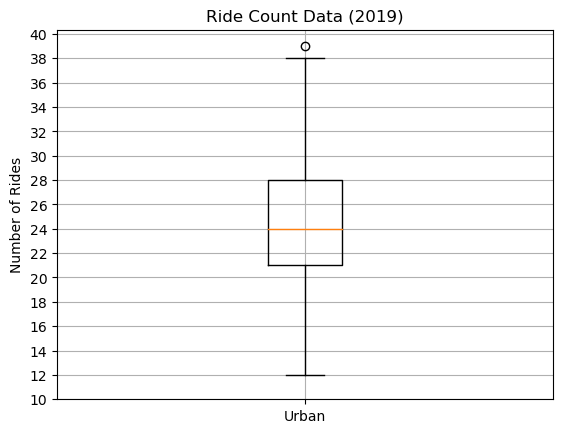

In [109]:
# Create a box-and-whisker plot for the urban cities ride count.

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

# Some of this code looks familiar, but a few lines are new. Let's break down what the code is doing.
 #1. First, we create the x-axis labels with a list, 
     ## x_labels = ["Urban"]
 #2. Next, the data and labels are passed in the 
     ## boxplot function
 #3. Finally, we set the 
     ## y_ticks 
     # with a range from 10 to 41 with ticks at an increment of 2. This will help determine where the minimum and maximum 
     # lie as well as any outliers

In [ ]:
# Looking at this box-and-whisker plot, we can see:
#1. There is at least one outlier, which is close to 40. This our maximum data point, 39.
#2. The minimum is 12.
#3. The median is 24 or the 50th percentile.
#4. The standard deviation is about 5 because the box upper and lower boundaries represent the upper and lower quartiles.

In [ ]:
# To show all the city type box-and-whisker plots on one chart we need to modify the 
## boxplot() 
# function and add other features. We will increase the size of the chart and the font of the title and axes labels.

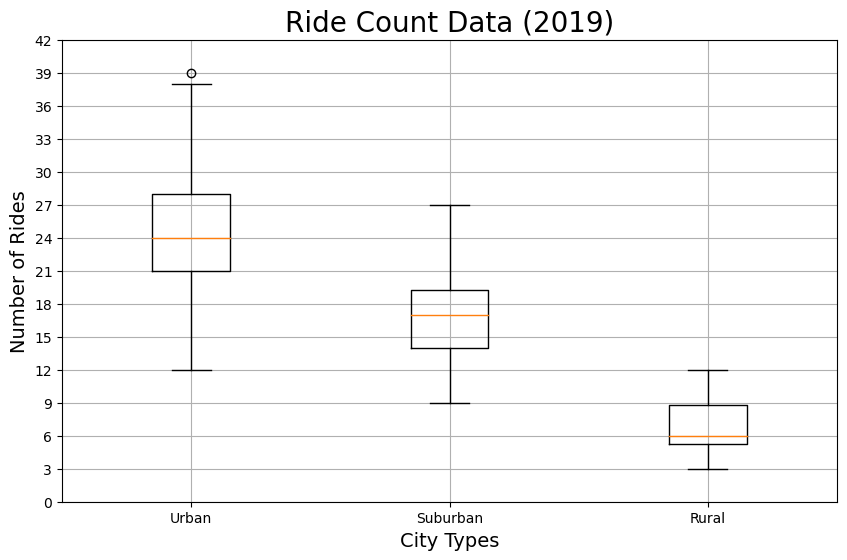

In [110]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [ ]:
# One of our tasks was to find out if there were any outliers. We know that the outlier for the urban_ride_count is 39. 
# From this information, we can find out which city has the highest rider count.

# Recall that the urban_ride_count is a Series with the index of the city and the data the number of rides for each city.

# We can get all the "True" values where the urban_ride_count equals 39. Then, we can filter the urban_ride_count Series for 
# all the "True" values and get the city name from the index, like this:

In [111]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


In [ ]:
# Box-and-Whisker Plots for Ride Fare Data

# Next, let's create box-and-whisker plots for the ride fare data with summary statistics.

# For the fare data, we will use the urban_fares Series we created earlier. Add the following code to the new cell:

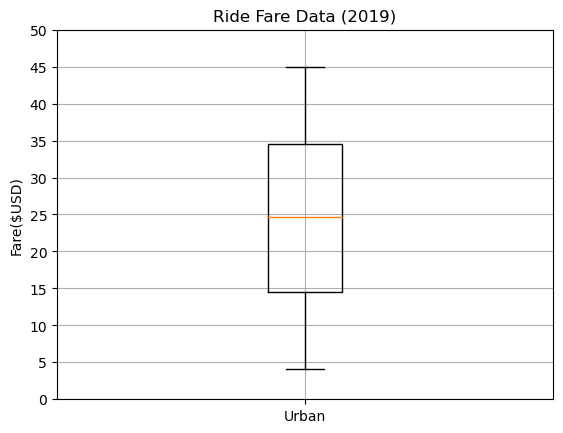

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [112]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

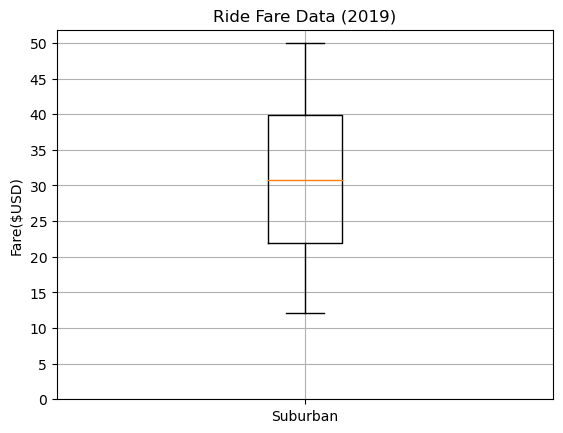

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [113]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

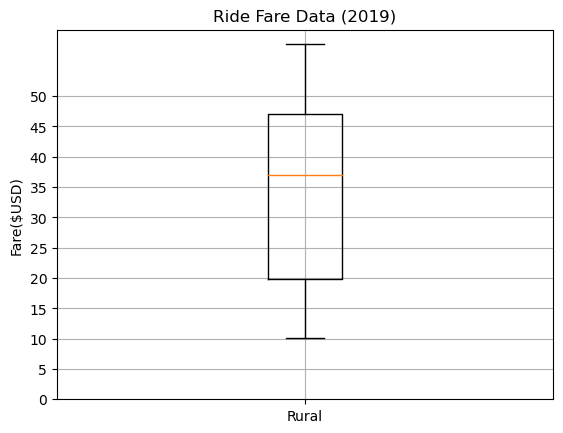

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [114]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

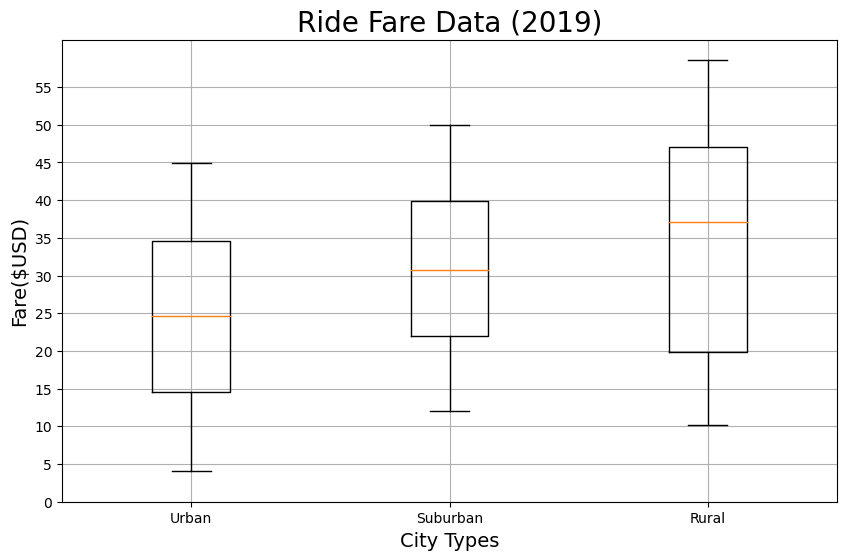

In [122]:
# SKILL DRILL
# Add all three city type fare data in one box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [ ]:
# From the combined box-and-whisker plots, we see that there are no outliers. However, the average fare for rides in the 
# rural cities is about $11 and $5 more per ride than the urban and suburban cities, respectively. Why do you think there is 
# such a big difference? By looking at the number of riders for each city, can you get a sense of the overall revenue?

In [ ]:
# Box-and-Whisker Plots for Driver Count Data

# We're getting really good at creating box-and-whisker plots! We need to do one last set of box-and-whisker plots. 
# Let's create a box-and-whisker plot for the driver count data with summary statistics.

# For the driver count data, we'll use the urban_drivers Series we created earlier. Add the following code to a new cell:

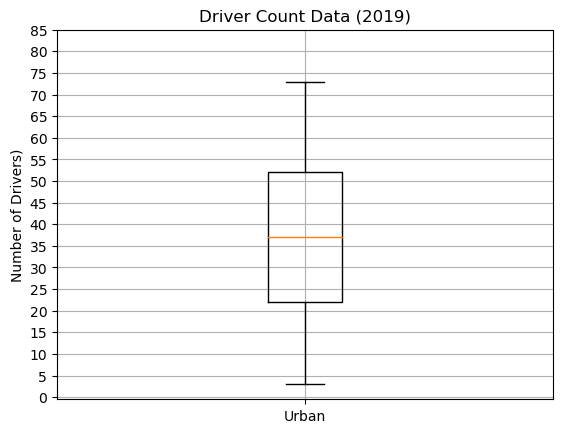

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [123]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

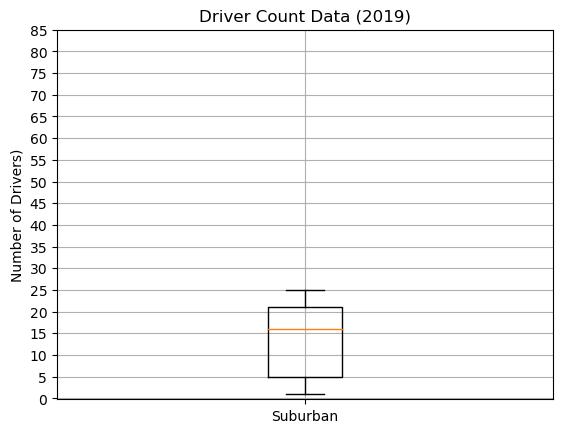

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [124]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

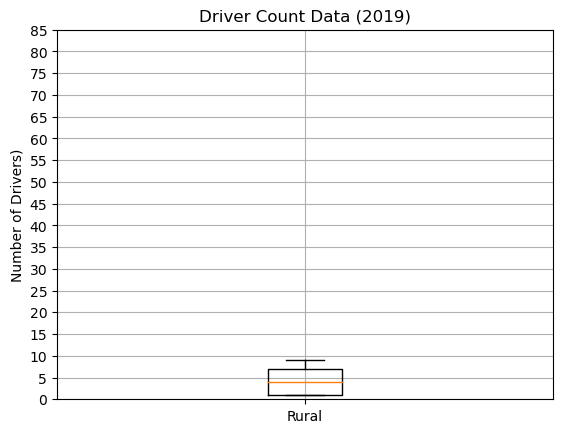

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [125]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

In [ ]:
# SKILL DRILL

# Create a box-and-whisker plot that has all three city types' driver count data in one box-and-whisker plot that looks similar 
# to the following image. Save this combined box-and-whisker plot as Fig4.png in your "analysis" folder.

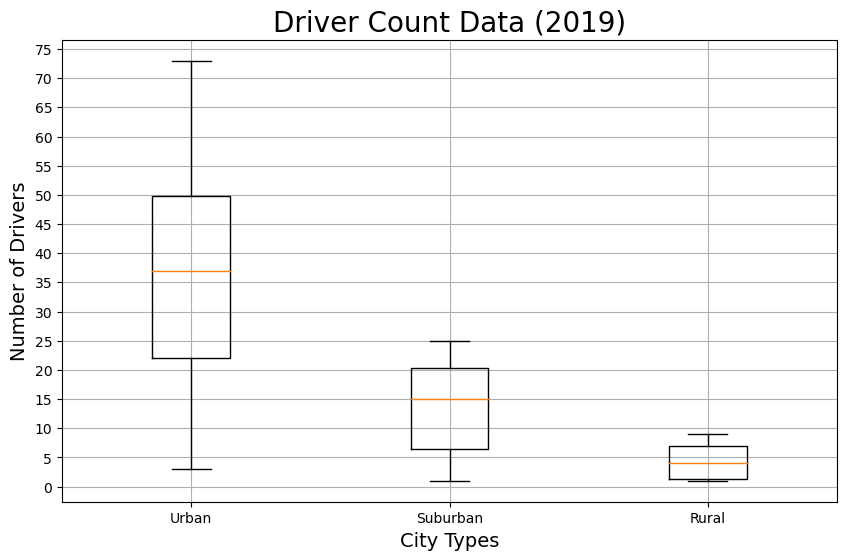

In [129]:
x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [ ]:
# The average number of drivers in rural cities is nine to four times less per city than in urban and suburban cities, 
# respectively. By looking at the driver count data and fare data, can you get a sense of the overall revenue?

In [ ]:
# 5.5.1 - Get the Percentage of Fares for Each City Type

In [ ]:
# To create this pie chart, we will need to do the following:
#1. Get the total fares for each city type.
#2. Get the total for all the fares for all the city types.
#3. Calculate the percentage of the total fares for each city type.

In [ ]:
#1. Get the total fares for each city type.

# To get the total fares for city type, we need to create a Series where the index is the type of city on the 
## pyber_data_df 
# DataFrame and the column is the sum of the fares for city type.

# To create a Data Series with one of the columns in a DataFrame, we can use the 
## groupby() 
# function and add the column inside the parentheses.

In [ ]:
# To calculate the percentage of the total fares for each city type based on the total fares, we will:
#1. Use the groupby() function on the pyber_data_df DataFrame and group by the type of city column so the type of city is 
    # the index.
#2. Apply the sum() method on the fare column to get the Series with the total number of fares for each city type.
#3. Divide the total fares for each city type by the total of all the fares and multiply by 100.

In [130]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [ ]:
#2. Get the total for all the fares for all the city types.

In [131]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [ ]:
#3. Divide the total fares for each city type by the total of all the fares and multiply by 100.

In [132]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [133]:
# As you become more adept at programming, you can perform the calculation in one line of code, as follows:

# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [ ]:
# 5.5.2 - Pie Chart for the Percentage of Fares by City Type

# We will create a pie chart by using the MATLAB approach, using the plt.pie() function.

# To create a pie chart with the plt.pie() function, we need an array that contains the values and labels we are plotting.

# We can use type_percents for the values for each pie wedge and create an array for the labels.

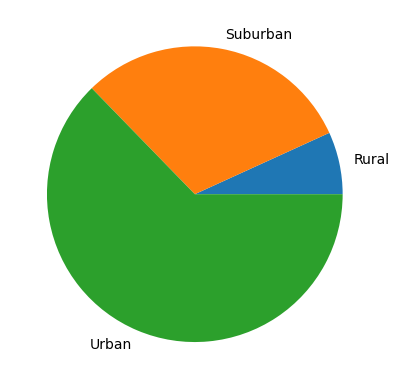

In [134]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

In [ ]:
# add a title, add the percentages, change the color to adhere to the company color scheme, add a shadow to the pie chart, 
# and adjust the start angle.

# Let's edit the plt.pie() function with the following added features:

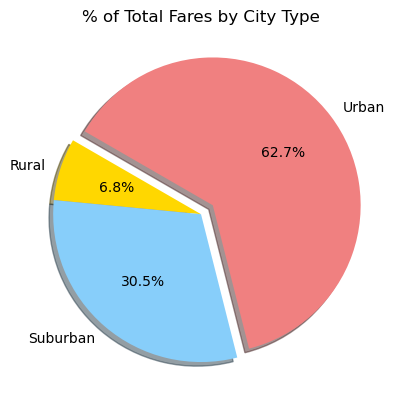

In [135]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

In [ ]:
# Before we save the pie chart, let's change the font size to 14. To do this, we will need to edit the code block.
# there is no parameter for fontsize in pie charts like there is for scatter plots
#  However, Matpltolib has a way to change the default parameters for charts by using the 
## rcParams
# which accesses the run and configure settings for the Matplotlib parameters.

# To change the default parameters we need to import the matplotlib library, which is not the same as the 
## matplotlib.pyplot 
# we imported for graphing with the plt() function. 

# Add
## import matplotlib as mpl
# on the first line

# After the plt.title(), we will change the font size by adding 
## mpl.rcParams['font.size'] = 14

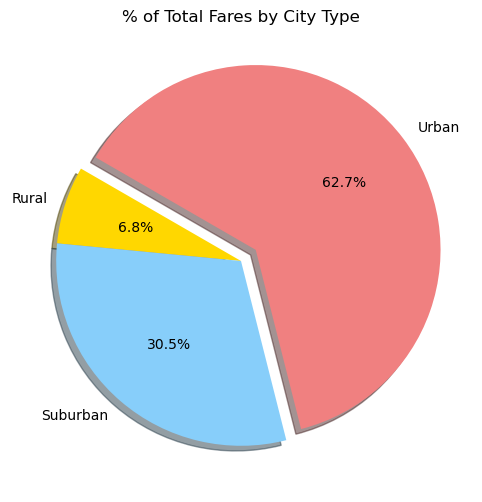

In [136]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [ ]:
# Now that you have created the first pie chart showing the percentage of total fares by city type, we need to create two 
# more pie charts: the percentage of total rides by city type and the percentage of total drivers by city type.

In [ ]:
# 5.6.1 - Calculate Ride Percentages

In [ ]:
# To create this pie chart, we need to do the following:

#1. Get the total number of rides for each city type.
    # To get the total rides for each type of city, we need to create a Series of data where the index is the type of city, 
    # and the column for the Series is the number of the rides for the type of city. This is similar to how we created the 
    # Series for the percentage of fares for each city type.
#2. Get the total rides for all the city types.
#3. Calculate the percentage of the total rides for each city type.

In [137]:
#1. Get the total number of rides for each city type.
    # To get the total rides for each type of city, we need to create a Series of data where the index is the type of city, 
    # and the column for the Series is the number of the rides for the type of city. This is similar to how we created the 
    # Series for the percentage of fares for each city type.

# To calculate the percentage of rides for each city type based on all the rides, we will:
## groupby()

pyber_data_df.groupby(["type"])

In [138]:
#2. Get the total rides for all the city types.

# Apply the count() function on the ride_id column to get the Series with the total number of rides for each city type:

pyber_data_df.groupby(["type"]).count()["ride_id"]

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [139]:
#3. Calculate the percentage of the total rides for each city type.

# Get the number of total rides using the count() function on the ride_id column on the pyber_data_df DataFrame:

pyber_data_df["ride_id"].count()

2375

In [140]:
#4. Divide the total number of rides for each city type by the total rides for all the cities and divide by 100.

# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

In [ ]:
# 5.6.2 - Pie Chart for Percentage of Rides by City Type

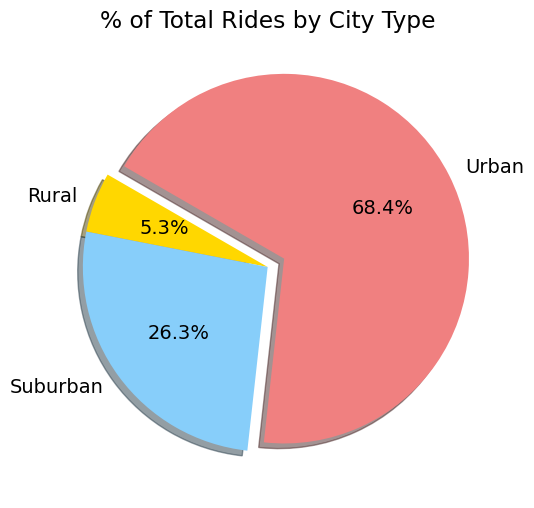

In [141]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()